Import thư viện

In [1]:
import numpy as np 
from numpy import log,dot,exp,shape
import pandas as pd
import matplotlib.pyplot as plt # Các bạn có thể thử plot chart bằng plotly
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split  

# 1: Implement hàm sigmoid

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 2: Implement lại Logistic Regression

In [3]:
def standardize(X_tr):
    # Normalize lại các giá trị để có thể tính toán một cách "mượt" hơn 
    # Sau này, khi xây dựng model, các bạn nên normalize lại dữ liệu trước khi train
    for i in range(shape(X_tr)[1]):
        X_tr[:,i] = (X_tr[:,i] - np.mean(X_tr[:,i]))/np.std(X_tr[:,i])


def f1_score(y,y_hat):
    tp, tn, fp, fn = 0,0,0,0
    for i in range(len(y)):
        if y[i] == 1 and y_hat[i] == 1:
            tp += 1
        elif y[i] == 1 and y_hat[i] == 0:
            fn += 1
        elif y[i] == 0 and y_hat[i] == 1:
            fp += 1
        elif y[i] == 0 and y_hat[i] == 0:
            tn += 1

    precision = tp / (tp + fp)
    recall = tp / (tp + fn) # Đôi khi còn được biết đến với độ nhạy (sensitivity, thường thấy nhiều trong các vấn đề liên quan đến thống kê trong bài toán phân loại 2 lớp)
    f1_score = 2 * precision * recall / (precision + recall)
    return f1_score

In [23]:
class LogisticRegression:
    def __init__(self, X,y,learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.theta = None
        self.loss_hist = []

    def _initialize(self,X):
        m, n = X.shape
        self.theta = np.zeros(n + 1)  # Initialize weights with zeros

    def fit(self, X, y):
        self._initialize(X)
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)  # Add bias column
        for _ in range(self.num_iterations):
            gradient = self._compute_gradient(X, y)
            self.theta -= self.learning_rate * gradient
            loss = self._compute_loss(X, y)
            self.loss_hist.append(loss)
    def _compute_gradient(self, X, y):
        m = len(y)
        h = self._sigmoid(X.dot(self.theta))
        gradient = X.T.dot(h - y) / m
        return gradient     
    def _compute_loss(self, X, y):
        m = len(y)
        h = self._sigmoid(X.dot(self.theta))
        loss = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
        return loss
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    @property
    def loss_hist_visual(self):
        plt.scatter([i for i in range(self.num_iterations)], self.loss_hist, c='red', s=10, label='loss')
        plt.legend(loc=1)
        plt.xlabel('Iteration')
        plt.ylabel('Loss')

    def predict(self,X):
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
        predictions = self._sigmoid(X.dot(self.theta))
        return (predictions >= 0.5).astype(int)



# 3a: Tạo dữ liệu

In [5]:
X, y = make_classification(n_features=2, n_classes=2, n_redundant=0, n_samples = 200, random_state=42)

#3b: Visualize dữ liệu

Text(0, 0.5, 'X $2^{nd}$ dimension')

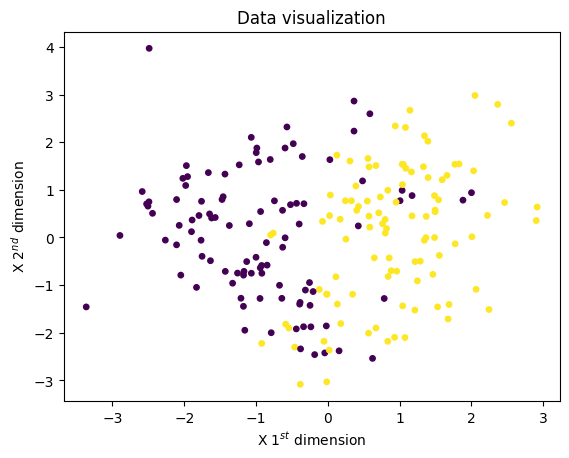

In [6]:
plt.scatter(X[:,0], X[:,1], c=y, s=15, cmap='viridis')
plt.title("Data visualization")
plt.xlabel('X $1^{st}$ dimension')
plt.ylabel('X $2^{nd}$ dimension')

# 3c: Chia dữ liệu thành train và test

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 4: Fit dữ liệu với Logistic Regression

In [8]:
standardize(X_train)
standardize(X_test)

In [24]:
cls = LogisticRegression(X_train, y_train, num_iterations = 1000)
model= cls.fit(X_train,y_train)
y_test_pred = cls.predict(X_test)
y_train_pred = cls.predict(X_train)

# 4b: Tính f1-score

In [25]:
f1_score_train = f1_score(y_train, y_train_pred)
f1_score_test = f1_score(y_test, y_test_pred)
print("f1 score train: ",f1_score_train)
print("f1 score test: ", f1_score_test)

f1 score train:  0.8518518518518519
f1 score test:  0.9268292682926829


# 4c: Visualize loss

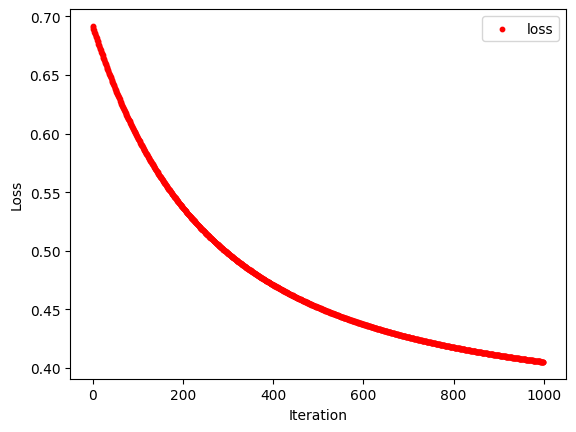

In [26]:
cls.loss_hist_visual

In [ ]:
#@title # 5c Visualize loss với learning rate và iter khác nhau {"display-mode": "form"}
# Các bạn có thể thêm param "run": "auto" vào trong dictionary để cell tự động chạy khi bạn chỉnh param
lr = 0.089 #@param {type:"slider", min:0, max:1, step:0.0005}
iter = 977 #@param {type:"slider", min:0, max:1000, step:1}

# Phần trên dành cho các bạn sử dụng Google Colab, với các bạn sử dụng Jupyter , các bạn hãy xoá tất cả và chạy code trong ô này nhé!
...

Ellipsis